# Data Analytics Tool 

## Introduction

This program is intended to complete a full data analyis.
It is able to pre-process the data set and give descriptive analysis results, all based on the users preferences.

The focus lies on being interactive and automated. In other words, the program contains specifically designed function for which it asks the user desires to perform these on her data set.

Any kind of csv file should be applicable. The user needs make sure the csv file is located in the correct directory.

## 1. Import of libraries and the data set 

In [1]:
## 1.1 Imports
import sys
import math
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sn

In [2]:
print("Hello User!\nLet's begin analysing your data!")

Hello User!
Let's begin analysing your data!


In [3]:
## 1.2 preparing answers for y/n questions and cancel possibilty 
yes = {"yes", "y"}
no = {"no", "n"}
cancel = {"cancel", "c"}

In [59]:
## 1.3 define function for reading data 

def start():
    #write file into global variable to use it outside of function
    global data
    inp = input("\nIs your csv file located in the correct working directory?(y/n): ")
    # we check if the inp is in the answer vectors yes or no and if not repeat the function
    if inp in yes:
        try:
            # allow the user to input the csv file name in the directory that is to be used
            original_name = input("\nWhat is the name of the csv in the directory (exclude .csv)?:  ")
            new_name = original_name+'.csv'
            data = pd.read_csv(new_name)
            print("\nIn the following tables you get an overview of your data including the head and tail: ")
            return data
        except FileNotFoundError:
            print("\nThere is no such file in your directory. Please retry!")
            start()
    # if answer no --> give second option to load it via working directory or url 
    elif inp in no:
        web = input("\nIs your csv file located online?(y/n): ")
        if web in yes:
            try:
                url = input("Please input your csv url:")
                data = pd.read_csv(url)
                print("\nIn the following tables you get an overview of your data including the head and tail: ")
                return data
            except FileNotFoundError:
                print("\nThere is no such file in your directory. Please retry!")
                start() 
        elif web in no: 
                print("\nPlease put your csv file in the correct working directory!")
                start()
        else: 
            sys.stdout.write("""\nPlease answer with "yes" or "no".""")
            start()
    # if answer not in yes or no or cancel --> repeat function            
    else: 
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        start()

In [5]:
# 1.3 cont. Execute function

start()



Is your csv file located in the correct working directory?(y/n): y

What is the name of the csv in the directory (exclude .csv)?:  StudentsPerformance

In the following tables you get an overview of your data including the head and tail: 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
## 1.4 more preparation
# get all columns name so we can check if necessary entries of column names by user are correct
columns = list(data.columns) 
c = []
d = []

In [7]:
## 1.5 showing max rows and columns of data set
print("\nYour data set includes the following number of rows and columns: ")
data.shape


Your data set includes the following number of rows and columns: 


(1000, 8)

## 2. Cleaning Data Set

The program continues with the data pre-processing, an important part for data analytics.  
It is able to various common commands of data analytics and will ask the user for the necessary inputs. 

In [23]:
## 2.1 defining an input function such that we can run this everytime the program needs to ask the user for columns 
## the user may like to edit

def getInput():
    # assign value to global variable c to use outside function
    global c
    c.clear()
    input_string = input("\nEnter all columns separated with comma and space (eg. (, )): ")
    # use space as split
    c  = input_string.split(", ")
    # check if values in vector are in columns list
    for char in c: 
        if char not in columns:
            print(char, "is not given in data set. Please retry!")
            getInput()
    return 

In [9]:
## 2.2 removing columns
# define function that asks for columns and deletes them 

def qRemove():
    inp = str(input("\nWould you like to remove columns from your data set? (y/n): ").lower())
    if inp in yes:
        getInput()
        # getInput() gives us a vector c which we can directly use for the df.drop function
        global data
        # insert c in df.drop 
        data = data.drop(c, axis = 1) # axis = 1 --> column
        # give user output to assure the execution was successful
        for char in c:
            print("\n" + char, "has been removed from the data set!")
        global columns
        columns = list(data.columns) 
        return 
    elif inp in no:
        return
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qRemove()
    return

In [10]:
## 2.2 cont. Execute function
qRemove()


Would you like to remove columns from your data set? (y/n): n


In [11]:
## 2.3 get further details of the data types 

print("""In the next table you will find more specific information about your data set:
("datetime64" stands for date data, int64" and "float64" stands for numeric data,\nwhereas "object" denotes categorical data)\n""")

data.dtypes

In the next table you will find more specific information about your data set:
("datetime64" stands for date data, int64" and "float64" stands for numeric data,
whereas "object" denotes categorical data)



gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [12]:
## 2.4 Transforming data types
# here we want to ask the user if there are columns present that the user wants to change the type in
# for this we create define functions for each column type and insert these into our main function 

#define category change function
def inpCat():
    inp =str(input("\nAre there columns that need to be changed into character type? (y/n): ").lower())
    if inp in yes:
        # getInput()
        getInput()
        for char in c:
            global data
            # change each value in vector to character type
            data[char] = data[char].astype(str)
            # assure success to user
            print(char, "has been changed to character!")
        return
    elif inp in no:
        return
    else: 
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        inpCat()
        
# define float change function
def inpNum():
    inp = str(input("\nAre there columns that need to be changed into numeric? (y/n): ").lower())
    if inp in yes:
        # getInput()
        getInput()
        for char in c:
            global data
            # change each value in vector to numeric type
            data[char] = pd.to_numeric(data[char])
            print(char, "has been changed to numeric!")
        return
    elif inp in no:
        return
    else: 
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        inpNum()      


#define date change function
def inpDate():
    inp = str(input("\nAre there columns that need to be changed into date? (y/n): ").lower())
    if inp in yes:
        # getInput()
        getInput()
        for char in c:        
            global data
            data[char] = pd.to_datetime(data[char], infer_datetime_format=True)
            print(char, "has been changed to date!")
        return
    elif inp in no:
        return
    else: 
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        inpDate()
        
        
# define main Transform function
def qTransform():
    inp = str(input("\nAre there any columns in the wrong format that need to be changed? (y/n): ").lower())
    # execute all functions sequentially
    if inp in yes:
        inpCat()
        inpNum()
        inpDate()
        global columns
        columns = list(data.columns) 
        return
    elif inp in no:
        return
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qTransform()
    return


In [13]:
# 2.4 cont. Execute function
qTransform()
print("\nSee the table with your prefered types:")
data.dtypes


Are there any columns in the wrong format that need to be changed? (y/n): n

See the table with your prefered types:


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [14]:
## 2.5 count number of null values

print("Here you see the number of null values for each variable.")

data.isnull().sum()

Here you see the number of null values for each variable.


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
## 2.6 remove NA values

# define function to ask if user wants to remove null values
def qDrop():
    inp = str(input("\nDo you want to remove the null values? (y/n): ").lower())
    if inp in yes:
        global data
        # will remove any null values 
        data = data.dropna(how="any", axis=0) # axis = 0 --> row
        print("\nNull values have been removed!")
    elif inp in no:
        return      
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qDrop()

In [16]:
# 2.6 cont. Execute function        
qDrop()


Do you want to remove the null values? (y/n): y

Null values have been removed!


In [18]:
## 2.7 Renaming columns 
# define function to ask if user wants to rename columns

def qRename():
    inp = str(input("\nDo you want to rename columns? (y/n): ").lower())
    if inp in yes:
        # getInput() 
        getInput()
        for char in c:
            global data
            # ask for new name
            newname_input = str(input("\nHow do you want to rename the column " + str(char) + "?: "))
            # use rename function to rename
            data = data.rename(columns = {char: newname_input})
            # update columns list for getInput() to continue working correctly
            global columns
            columns = list(data.columns) 
            # give user update how every value has been renamed to 
            print(str(char) +" has been renamed to " + str(newname_input)+"!")
    elif inp in no:
        return      
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qRename()


In [21]:
## 2.7 cont. Execute function
qRename()


Do you want to rename columns? (y/n): race/ethnicity, parental level of eductation, test preparation course

Please answer with "yes" or "no".
Do you want to rename columns? (y/n): y

Enter all columns separated with space: race/ethnicity, parental level of eductation, test preparation course
parental level of eductation is not given in data set. Please retry!

Enter all columns separated with space: race/ethnicity, parental level of education, test preparation course

How do you want to rename the column race/ethnicity?: ethnicityGroup
race/ethnicity has been renamed to ethnicityGroup!

How do you want to rename the column parental level of education?: parentalEducation
parental level of education has been renamed to parentalEducation!

How do you want to rename the column test preparation course?: prepCourse
test preparation course has been renamed to prepCourse!


In [24]:
## 2.8 check for duplicates 

# To get rid of duplicates we check if the *key* appears more than once
# A key in a data set is a variable which is unique. In other words, the key is the value whith which
# you can access each single observation. 
# Thus the program asks the user for the key. The user must know this key! 
# The program hasn't got the intelligence to figure it out by itself. 

# defining question for key
def Key():
    # get key
    key = input("\nWhat column is the primary key of your data set?: ")
    # give user option to cancel if he doesn't know key --> no checking for duplicates will be possible
    if key in cancel:
        return
    # retry if key has been misstyped
    elif key not in columns:
        print("\nThere is no such variable. Please try again!")
        qKey()
    else:
        return key


# defining removal of duplicates 
def removeDupl():
    inp = str(input("\nDo you want to remove the duplicates from your data set? (y/n): ").lower())
    if inp in yes:
        global data
        # drop_duplicates to delete any duplicates in key column
        data = data.drop_duplicates(key)
        # give user update for success
        print("\nThe duplicates have been removed!")
    elif inp in no:
        return 
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        removeDupl()
    return

#defining overall question for handling duplicates
def qDuplicates():
    inp = str(input("\nDo you want to check for duplicates in your data set? (y/n): ").lower())
    if inp in yes:
        # call global key
        global key
        # use Key() function and add value to variable key
        key = Key()
        # sum the number of duplicates in the column key
        duplications = sum(data.duplicated(key))
        # inform user
        print("There are", duplications, "duplicates in your data set.")
        # if there are no duplicates the function will end and move on,
        # as there is no reason to ask for deleting 0 duplicates
        if duplications == 0:
            return
        # if not 0 then move on to ask for the removal of duplicates
        else:
            removeDupl()
    elif inp in no: 
        return
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qDuplicates()  
    return

In [25]:
# 2.8 cont. Execute functions
qDuplicates()


Do you want to check for duplicates in your data set? (y/n): no


In [26]:
## 2.9 asking if everything is correct and give user the possibility to repeat corrections

def qAgainNested():
    # ask for input which function the user wants to repeat
    # each letter a-e corresponds to a function
    again = str(input("\nWhat would you like to repeat? Enter the corresponding letter (a-e): ").lower())    
    # abort function and potential endless loop by entering "cancel", as "c" is a command to execute a function
    if again == "cancel":
        q2Again()
        return
    elif again == "a":
        qRemove()
        q2Again()
    elif again == "b":
        qTransform()
        q2Again()
    elif again == "c":
        qDrop()
        q2Again()
    elif again == "d":
        qRename()
        q2Again()
    elif again == "e":
        qDuplicates()
        q2Again()
    # repeat this function if a incorrect input has been given
    else: 
        sys.stdout.write("""\nPlease answer with a letter between "(a-e)".""")
        qAgainNested()

def q2Again():
    inp2 = str(input("\nDo you want to repeat another function? (y/n): ").lower())
    if inp2 in yes:
        # move to main function to print the possibilites again 
        qAgain()
    elif inp2 in no:
        # give last overall output before finishing data pre-processing
        print("\nPerfect!\nWe are left with the following number of observations and variables:\n" + 
              str(data.shape[0]) + " | " + str(data.shape[1]))
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        q2Again()  

def qAgain():
    # list different functions and ask if user wants to repeat one of these
    inp = str(input("\nDo you want to repeat one of these listed functions?"+
                    "\na) Removing Columns" + 
                    "\nb) Transforming data types"+
                    "\nc) remove NA values"+
                    "\nd) Renaming columns"+
                    "\ne) Check for duplicates"+
                    "\n (y/n): ")).lower()
    # if yes move to function above 
    if inp in yes:
        qAgainNested()
    # if no finish data-preprocessing
    elif inp in no:
        print("\nPerfect!\nWe are left with the following number of observations and variables:\n" + 
              str(data.shape[0]) + " | " + str(data.shape[1]))
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qAgain()
        

In [27]:
## 2.9 cont. Exectute functions

qAgain()


Do you want to repeat one of these listed functions?
a) Removing Columns
b) Transforming data types
c) remove NA values
d) Renaming columns
e) Check for duplicates
 (y/n): n

Perfect!
We are left with the following number of observations and variables:
1000 | 8


## 3. Univariate Analysis

After the data processing we now start with descriptive analysis of the data set.  
The program starts with categorical data and then switches to numerical data.  
The program gives the chance to examine each value individually.

In [32]:
def askCat():
    # call global variable 
    global d
    d.clear()
    # ask for the keys as they lead to errors in categorical grid plot
    input_string = input("\nEnter all key related categorical type columns: ")
    if input_string == "none":
        return
    else:
        d  = input_string.split(" ")
    return

In [29]:
##  3.0.1 split numerical and categorical data into two lists

print("\nWe now continue with our analyis of the data."+
     "\nFor the next step please enter all key related character type columns and" +
      " other character type columns in the next field that you think have *subgroups > 80*!" +
     "\nOtherwise the results for plotting may become unsatisfying and even lead to errors.")

# define function to separate numerical and categorical data into two lists

def qGetNumType():
  # select all numerical variables
    num_variables = data.select_dtypes(include=["int64","float64"]).columns
    return list(num_variables)

def qGetCatType():
     # select all categorical variables
    cat_variables = data.select_dtypes(include=["object"]).columns
    # use getCat() as we need to delete these columns from the list
    askCat()
    # use try & except if an incorrect value has been entered an repeat function
    try:
        cat_variables = cat_variables.drop(d)
    except KeyError:
        print("You have entered a non categorical column. Please retry!")
        qGetCatType()
    return list(cat_variables)


We now continue with our analyis of the data.
For the next step please enter all key related character type columns and other character type columns in the next field that you think have *subgroups > 80*!
Otherwise the results for plotting may become unsatisfying and even lead to errors.


In [33]:
# 3.0.1 cont. Execute function

num_variables = qGetNumType()
cat_variables = qGetCatType()
print("\nYour data has been split into two categories:\nNumerical and Categorical"+
      "\nYour data set contains", str(len(num_variables)), "numerical and", str(len(cat_variables)), "categorical variables.")


Enter all key related categorical type columns: none

Your data has been split into two categories:
Numerical and Categorical
Your data set contains 3 numerical and 5 categorical variables.


## 3.1 Categorical Data analysis



Below you can explore a grid of count plots including all the categorical data of your data set:



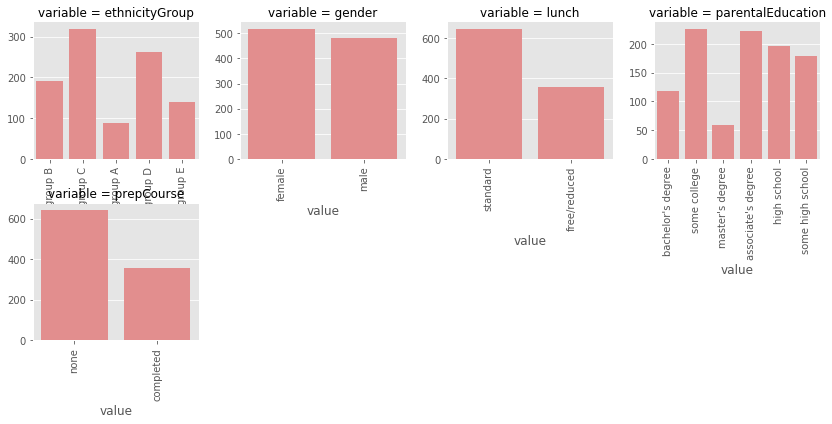

In [36]:
# 3.1.1 grid plotting categorical data
# it takes all categorical variables and plots them into a histogram
# it is sometimes messy for some variables with large number of subgroups . 
if len(cat_variables) > 0:
    print("\nBelow you can explore a grid of count plots including all the categorical data of your data set:\n")
    # create identifier variables and measured variables 
    cat_melt = pd.melt(data, value_vars=sorted(cat_variables))
    # create grid plot with all categorical variables, print max 4 plots per row 
    cat_grid = sn.FacetGrid(cat_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
    # turn xticks to vertical to avoid overlapping
    plt.xticks(rotation="vertical")
    # mapping data set on grid, define countplot to count occurences in each subgroup
    cat_grid = cat_grid.map(sn.countplot, "value", color = "lightcoral",)
    # set properties of xticks, rotate to vertical, apply to all axes
    [plt.setp(ax.get_xticklabels(), rotation=90) for ax in cat_grid.axes.flat]
    plt.show()

### Specific categorical analysis

Here the program starts with looking at a categorical values individually. The user chooses which and how many columns he wants to inspect.

In [94]:
## in contrast to before here only a single value is asked instead of multiple
# the mechanism itself stays the same
def getSingleInput():
    global e
    inp = str(input("Enter a single variable: "))
    e = inp
    # give user option to leave loop by typing "none"
    if e == "none":
        return
    else:
        if e not in cat_variables:
            print(e, "is not given in the list for categorical columns. Please retry!")
            getSingleInput()
        else:
            return

In [96]:
## 3.1.2 value_counts 
#counts the number of each single group of category and presents result in a small df

def qCat():
    inp = str(input("\nDo you want to look at a specific categorical column individually? (y/n): ")).lower()
    if inp in yes:
        countCat()
    elif inp in no:
        return
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qCat()
    
def countCat():
    getSingleInput()
    if e == "none":
        return
    else:
        # count subgroups and list a table of these
        a = data[e].value_counts()
        a = pd.DataFrame(a)
        return a

In [88]:
## 3.1.3 ask for repetition
# give user option for repeating this function indefinetely
def AgainCat():
    inp = str(input("Do you want to do the same analyis for another categorical variable? (y/n): ")).lower()
    if inp in yes:
        # repeat qCat() function and repeat AgainCat() to create loop
        countCat()
        AgainCat()
    elif inp in no: 
        print("\nWe now move on to the numerical values.")
    else: 
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        AgainCat()

In [95]:
## 3.1.3 cont. Execute function
if len(cat_variables) >0:
    qCat()


Do you want to look at a specific categorical column individually? (y/n): y
Enter a single variable: gender


In [97]:
## 3.1.3 cont. Execute function
if len(cat_variables) > 0:
    countCat()

Enter a single variable: gender


In [98]:
countCat()

Enter a single variable: gender


,gender
female,518
male,482


## 3.2 Numerical Data analysis


Below you can explore a grid of distribution plots including all the numerical data of your data set:



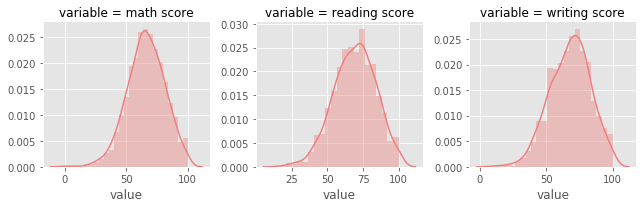

In [42]:
## 3.2.1 distribution grid plot of all numerical variables
# takes all numerical variables and plots them into an distribution plot
if len(num_variables) >0:
    print("\nBelow you can explore a grid of distribution plots including all the numerical data of your data set:\n")
    # create identifier values and measured values
    num_melt = pd.melt(data, value_vars=sorted(num_variables))
    # create grid plot, max 4 plots per row
    num_grid = sn.FacetGrid(num_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
    # define plots as distribution plots 
    num_grid = num_grid.map(sn.distplot, "value", color = "lightcoral")

###  Specific Numeric analysis



Like before for categorical data the program here asks which *numerical* columns the user wants to inspect more specifically.



In [43]:
## 3.2.2 define function for a descriptive summary

def Summary():
    for char in c:
        # calculate various measures such as mean, median, quantiles, and min and max
        mean = data[char].mean()
        median = data[char].median()
        std = data[char].std()
        mini = data[char].min()
        q_25 = data[char].quantile(q=0.25)
        q_50 = data[char].quantile(q=0.5)
        q_75 = data[char].quantile(q=0.75)
        maxi = data[char].max()
        # print the results
        print("\nVariable " +str(char)+ " possesses the following properties:\n\nmean: \t\t", round(mean, 2),
              "\nmedian: \t", round(median, 2),
             "\nstd: \t\t", round(std, 2),
             "\nmin: \t\t", round(mini, 2),
             "\n25%: \t\t", round(q_25, 2),
             "\n50%: \t\t", round(q_50, 2),
             "\n75%: \t\t", round(q_75, 2),
             "\nmax: \t\t", round(maxi, 2)) 
    return  


In [44]:
## 3.2.3 define function for inspecting Skew & Kurtosis
def SkewKurtosis():
    for char in c:
        # calculate skew and kurtosis for each value and print results 
        skew = data[char].skew()
        kurtosis = data[char].kurtosis()
        print("\nResults for " + str(char) + ":")
        print("Skew: ", round(skew, 2) , "| Kurtosis: ", round(kurtosis, 2))
        if skew >= -0.5 and skew <= 0.5:
            print("\nA skew value of", round(skew,2), "indicates a fairly symmetric distribution.")
        elif skew > 0.5 and skew <=1:
            print("\nA skew value of", round(skew,2), "indicates a moderately right skewed distribution.")
        elif skew >1:
            if skew > 10:
                print("\nA skew value of", round(skew,2), "indicates an extremely right skewed distribution.")
            else:
                print("\nA skew value of", round(skew,2), "indicates a highly right skewed distribution.")
        elif skew >= -1 and skew <-0.5:
            print("\nA skew value of", round(skew,2), "indicates a moderately left skewed distribution.")
        elif skew <-1:  
            if skew <-10:
                print("\nA skew value of", round(skew,2), "indicates an extremely left skewed distribution.")
            else:
                print("\nA skew value of", round(skew,2), "indicates a highly left skewed distribution.")
        if kurtosis <2.9:
            if kurtosis<0:
                print("The kurtosis with a value of", round(kurtosis,2), "may indicate a bimodal distribution with two different modes.")
            if kurtosis >= 0:
                print("The kurtosis with a value of", round(kurtosis,2), "is platykurtic.\nThis indicates a low and broad peak.\nIn addition, this means that the distribution is shorter and tails are thinner.\nOutliers are less likely")
        elif kurtosis >3.1: 
            if kurtosis > 30:
                print("The kurtosis with a value of", round(kurtosis,2), "is extremely leptokurtic.\nThis indicates a very high and sharp peak.\nIn addition, this means that the distribution is long and fat tails are observable.\nOutliers are highly possible.")
            else:
                print("The kurtosis with a value of", round(kurtosis,2), "is leptokurtic.\nThis indicates a high and sharp peak.\nIn addition, this means that the distribution is long and fat tails are observable.\nOutliers are highly possible.")
        elif kurtosis >=2.9 and kurtosis <= 3.1:
            print("The kurtosis with a value of", round(kurtosis,2), "is Mesokurtic.\nThis indicates a similar distribution to a normal distribution.")
    return       
            

In [ ]:
## 3.2.4 count outliers
def Outliers():
    # check for outliers in each variable
    for char in c:
        # outliers are defined by being smaller than 0.25 quantile or larger than 0.75 quantile
        q_25 = data[char].quantile(q=0.25)
        q_75 = data[char].quantile(q=0.75)
        # print results to inform user
        print("\nThe total number of outliers for " + str(char) + " is", sum((data[char]<q_25) | (data[char]>q_75))+ ".")
    return
        
        

In [46]:
## 3.2.5 plotting boxplot to further 

def Boxplot():
    for char in c:
        print("\nBelow you can examine a boxplot based on the variable " + str(char)+":")
        # create boxplot, large enough to properly fit in outliers 
        plt.figure(figsize=(14,4))
        # make boxplot horizontal to ease analysis
        data[char].plot.box(vert = False)
        plt.show()
    return

In [47]:
## 3.2.6 ask if user wants to repeat numerical analysis for other variables

def AgainNum():
    # give user option to repeat this sequence
    inp = str(input("Do you want to do the same analyis for another numeric variables? (y/n): ")).lower()
    if inp in yes:
        # insert all functions from input to repeating this function again
        getInput()
        Summary()
        SkewKurtosis()
        Outliers()
        Boxplot()
        AgainNum()
    elif inp in no: 
        print("\nWe now move on to our correlation matrix.")
    else: 
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        AgainNum()

In [48]:
## 3.2.7 define function to ask which variables the user wants to inspect individually

def qNumValue():
    inp = str(input("\nDo you want to examine any numerical columns individually? (y/n): ").lower())
    if inp in yes:
        # insert all functions from input to repeating the process
        getInput()
        Summary()
        SkewKurtosis()
        Outliers()
        Boxplot()
        AgainNum()
    elif inp in no:
        return
    else:
        sys.stdout.write("""\nPlease answer with "yes" or "no".""")
        qNumValue()


Do you want to examine any numerical columns individually? (y/n): y

Enter all columns separated with comma and space (eg. (, )): math score, reading score, write score
write score is not given in data set. Please retry!

Enter all columns separated with comma and space (eg. (, )): math score, reading score, writing score

Variable math score possesses the following properties:

mean: 		 66.09 
median: 	 66.0 
std: 		 15.16 
min: 		 0 
25%: 		 57.0 
50%: 		 66.0 
75%: 		 77.0 
max: 		 100

Variable reading score possesses the following properties:

mean: 		 69.17 
median: 	 70.0 
std: 		 14.6 
min: 		 17 
25%: 		 59.0 
50%: 		 70.0 
75%: 		 79.0 
max: 		 100

Variable writing score possesses the following properties:

mean: 		 68.05 
median: 	 69.0 
std: 		 15.2 
min: 		 10 
25%: 		 57.75 
50%: 		 69.0 
75%: 		 79.0 
max: 		 100

Results for math score:
Skew:  -0.28 | Kurtosis:  0.27

A skew value of -0.28 indicates a fairly symmetric distribution.
The kurtosis with a value of 0.27 is

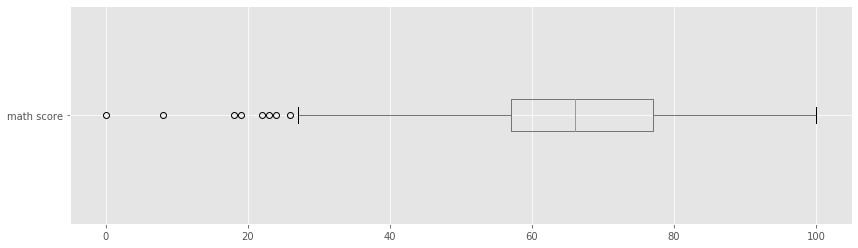


Below you can examine a boxplot based on the variable reading score:


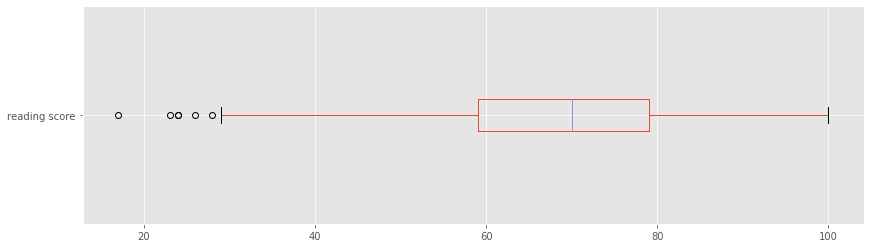


Below you can examine a boxplot based on the variable writing score:


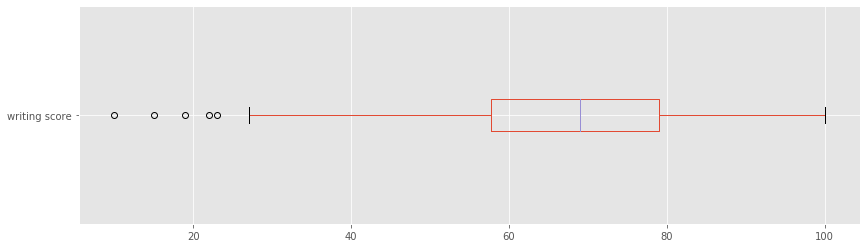

KeyboardInterrupt: 

Do you want to do the same analyis for another numeric variables? (y/n): n


In [49]:
## 3.2.7 cont. Execute function
if len(num_variables) > 0:
    qNumValue()


Lastly, you can see a correlation matrix based on the numeric variables.
Please inspect it for potential and interesting correlations in your data set!


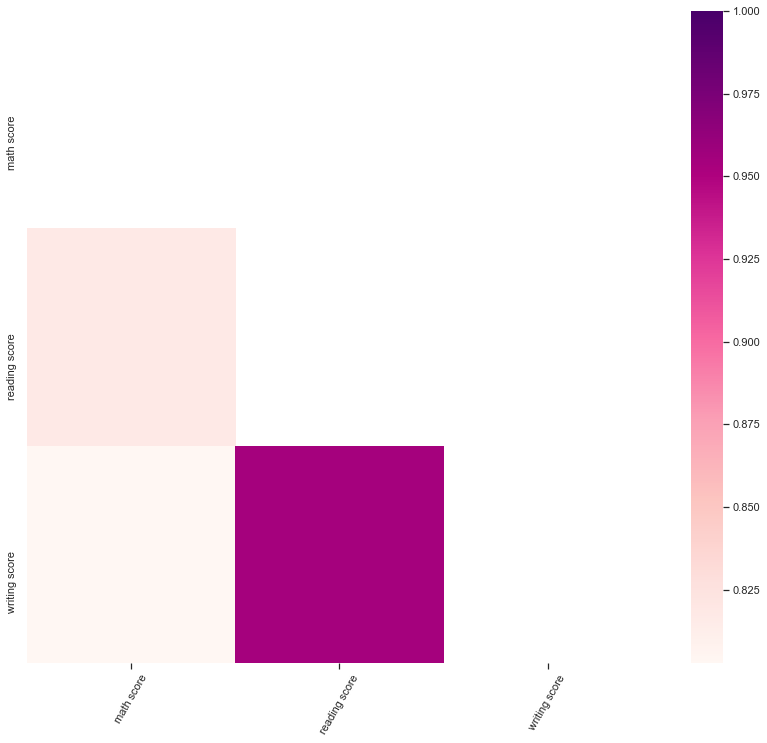

In [50]:
## 3.2.8 correlation Matrix of the numerical variables

print("\nLastly, you can see a correlation matrix based on the numeric variables." +
      "\nPlease inspect it for potential and interesting correlations in your data set!")
# plot correlation matrix 
sn.set(style="white")
# calculate correlation
corr = data.corr()
# set figure
fig = plt.figure(figsize=(14,12))
# 111 --> only one plot 
ax = fig.add_subplot(111)
# create diverging palette of colors
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# only show half plot
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# create heatmap
sn.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           mask=mask,
           cmap="RdPu")
ax.xaxis.tick_bottom()
# set labels, rotation 60 degrees
plt.setp(ax.get_xticklabels(), rotation=60)
plt.show()

In [ ]:
print("You have finished the data analyis!")